# Empirical Discrete Distributions

The empirical distribution describes a sample of observations of a given variable, in this case, a discrete variable. At a given point, its value is the proportion of sample observations less than or equal to that point.

In [1]:
#!pip install numpy
#!pip install matplotlib
#!pip install seaborn
#!pip install scipy

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; 
sns.set_style("whitegrid")

Calculating the Empirical Distribution Function of an arbitrary Discrete Distribution:

In [3]:
from scipy.stats import rv_discrete

## Working with an unfair die

In [4]:
dk = np.arange(1,7)
dk

array([1, 2, 3, 4, 5, 6])

The probability of `5` is `1/2`. The other values have the same probability `1/10`.

In [5]:
pk = (1/10, 1/10, 1/10, 1/10, 1/2, 1/10)
pk

(0.1, 0.1, 0.1, 0.1, 0.5, 0.1)

In [6]:
# Verifying that the sum of their probabilities is one
print(np.array(pk).sum())

1.0


In [7]:
unfair_die = rv_discrete(values=(dk,pk))

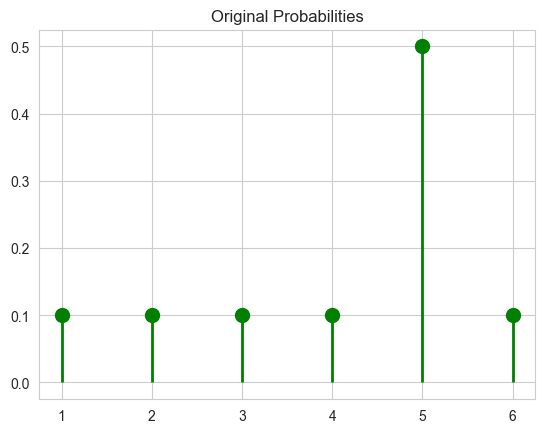

In [8]:
# Plotting
plt.plot(dk, unfair_die.pmf(dk),'go', ms=10)
plt.vlines(dk, 0, unfair_die.pmf(dk), colors='g', lw=2)
plt.title('Original Probabilities');

Let's generate 10 values of our unfair die:

In [9]:
# Generating 10 random values of our unfair die
gen_10_values = unfair_die.rvs(size=10)
gen_10_values

array([5, 3, 3, 5, 2, 5, 2, 5, 5, 4])

In [10]:
type(gen_10_values)

numpy.ndarray

In [11]:
elem, freq = np.unique(gen_10_values, return_counts=True)
freq = freq/len(gen_10_values)
print(dict(zip(elem, freq)))

{2: 0.2, 3: 0.2, 4: 0.1, 5: 0.5}


Let's graph the results.

- The green points represent the actual probabilities.

- The orange bars represent the probabilities calculated from the generated values.

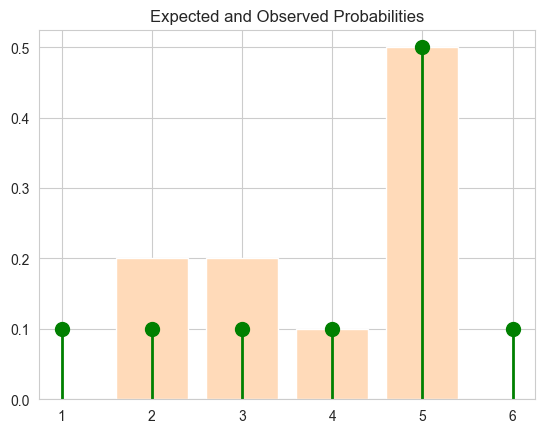

In [12]:
# Plotting
plt.plot(dk, unfair_die.pmf(dk),'go', ms=10)
plt.vlines(dk, 0, unfair_die.pmf(dk), colors='g', lw=2)
plt.bar(elem, freq, color='peachpuff')
plt.title('Expected and Observed Probabilities');

Let's create a function with the previous code:

In [13]:
def generate_unfair_die(n=10):
    gen_values = unfair_die.rvs(size=n)
    elem, freq = np.unique(gen_values, return_counts=True)
    freq = freq/n
    print(dict(zip(elem, freq)))
    plt.plot(dk, unfair_die.pmf(dk),'go', ms=10)
    plt.vlines(dk, 0, unfair_die.pmf(dk), colors='g', lw=2)
    plt.bar(elem, freq, color='peachpuff')
    plt.title('Expected and Observed Probabilities');

{1: 0.1, 3: 0.1, 4: 0.1, 5: 0.3, 6: 0.4}


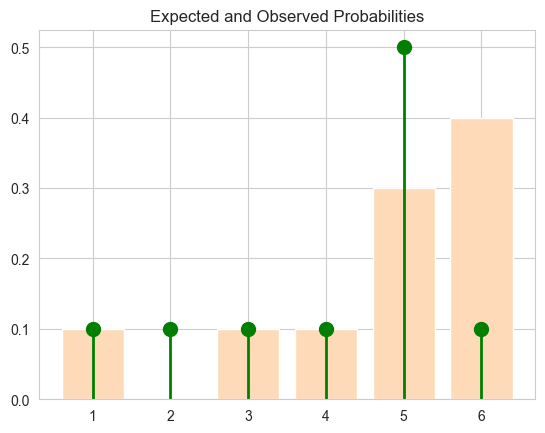

In [14]:
generate_unfair_die(10)

Notice that the previous two results are not the same because we generate different sets of 10 values for each. Notice also that observed and expected frequencies are not so close.

Generating 100 values of our unfair die

{1: 0.13, 2: 0.11, 3: 0.08, 4: 0.1, 5: 0.5, 6: 0.08}


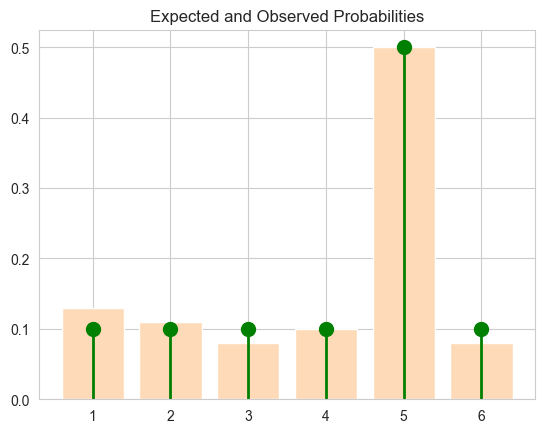

In [15]:
generate_unfair_die(100)

Now the real probabilities (green dots) and the observed ones (orange bars) are much closer.

Generating 1000 values of our unfair die

{1: 0.097, 2: 0.115, 3: 0.108, 4: 0.093, 5: 0.491, 6: 0.096}


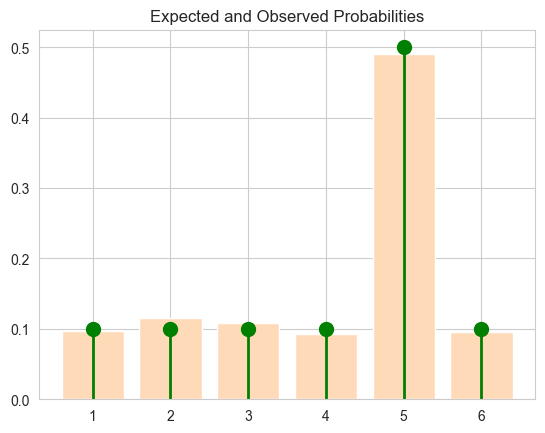

In [16]:
generate_unfair_die(1000)

Again the real probabilities (green dots) and the observed ones (orange bars) are much closer.

Generating 10000 values of our unfair die

{1: 0.0999, 2: 0.1027, 3: 0.0959, 4: 0.1021, 5: 0.4972, 6: 0.1022}


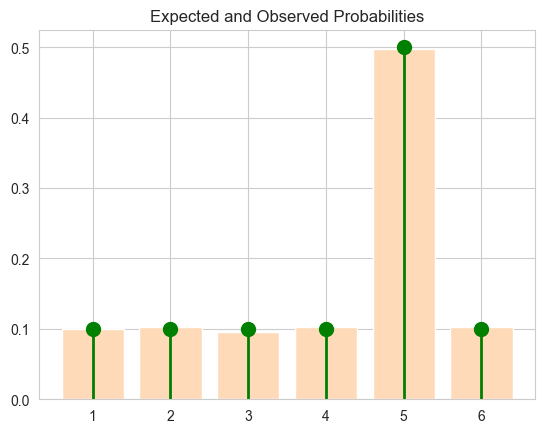

In [17]:
generate_unfair_die(10000)

The more random numbers of our unfair die we generate, the closer the observed and expected probabilities will be. 

## Using a sequence of random values

Let's create a discrete pdf using a sequence of random values.

In [18]:
# Generating 500 uniform values from 1 to 6 and calculating their frequencies
seq1 = np.random.randint(1, 7, size=500)
elem1, freq1 = np.unique(seq1, return_counts=True)
freq1 = freq1/len(seq1)
print(dict(zip(elem1, freq1)))

{1: 0.162, 2: 0.174, 3: 0.164, 4: 0.178, 5: 0.146, 6: 0.176}


Generating Poisson values

In [19]:
from scipy.stats import poisson

In [20]:
# Generating 500 Poisson values and calculating their frequencies
seq2 = poisson.rvs(mu=1, size=500)
elem2, freq2 = np.unique(seq2, return_counts=True)
freq2 = freq2/len(seq2)
print(dict(zip(elem2, freq2)))

{0: 0.33, 1: 0.402, 2: 0.182, 3: 0.066, 4: 0.014, 5: 0.006}


Combining the two sequences

In [21]:
original_values = np.concatenate([seq1, seq2])

In [22]:
# Calculating the frequencies of the combining sample
xk, fk = np.unique(original_values, return_counts=True)
fk = fk/len(original_values)
print(dict(zip(xk, fk)))

{0: 0.165, 1: 0.282, 2: 0.178, 3: 0.115, 4: 0.096, 5: 0.076, 6: 0.088}


Creating a discrete distribution function

In [23]:
new_disc_f = rv_discrete(values=(xk, fk))

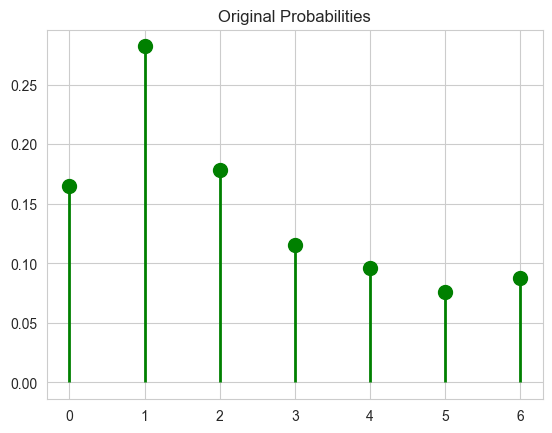

In [24]:
# Plotting our discrete distribution
plt.plot(xk, new_disc_f.pmf(xk),'go', ms=10)
plt.vlines(xk, 0, new_disc_f.pmf(xk), colors='g', lw=2)
plt.title('Original Probabilities');

Suppose this is our distribution, and we are interested in generating random numbers of that distribution.

Generating 10 new values of our new distribution.

In [25]:
new_10_values = new_disc_f.rvs(size=10)
new_10_values

array([0, 2, 3, 4, 5, 2, 0, 3, 0, 0], dtype=int64)

Creating a function:

In [26]:
def generate_discrete_dist(disc_f, n=10):
    gen_values = disc_f.rvs(size=n)
    elem, freq = np.unique(gen_values, return_counts=True)
    freq = freq/n
    print(dict(zip(elem, freq)))
    plt.plot(xk, disc_f.pmf(xk),'go', ms=10)
    plt.vlines(xk, 0, disc_f.pmf(xk), colors='g', lw=2)
    plt.bar(elem, freq, color='lightgray')
    plt.title('Expected and Observed Probabilities');

{0: 0.2, 1: 0.4, 2: 0.2, 3: 0.1, 4: 0.1}


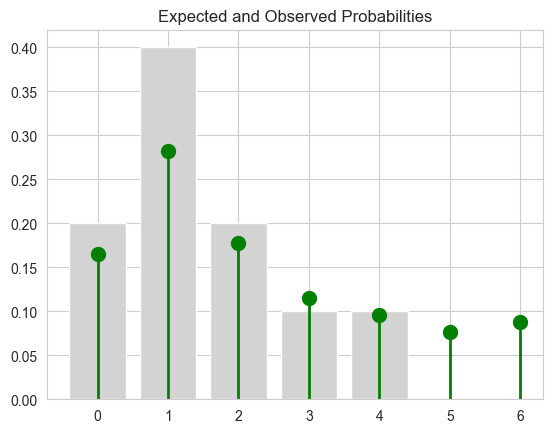

In [27]:
# The default value is n=10
generate_discrete_dist(new_disc_f)

10 values are not enought. The expected (green dots) and observed (grey bars) probabilities are far away each others.

Generating 100 values

{0: 0.21, 1: 0.28, 2: 0.18, 3: 0.12, 4: 0.08, 5: 0.05, 6: 0.08}


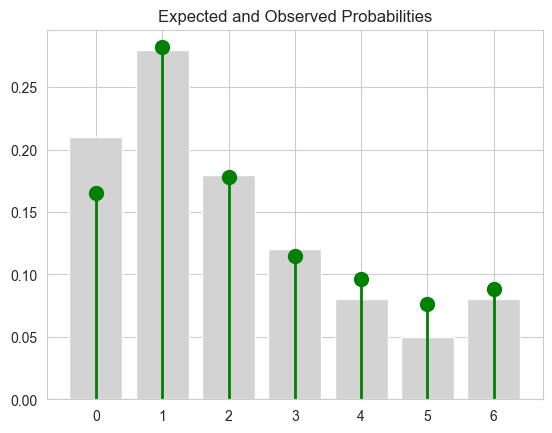

In [28]:
generate_discrete_dist(new_disc_f, 100)

The results are better, but we can improve them.

Generating 1000 values

{0: 0.164, 1: 0.273, 2: 0.176, 3: 0.126, 4: 0.097, 5: 0.08, 6: 0.084}


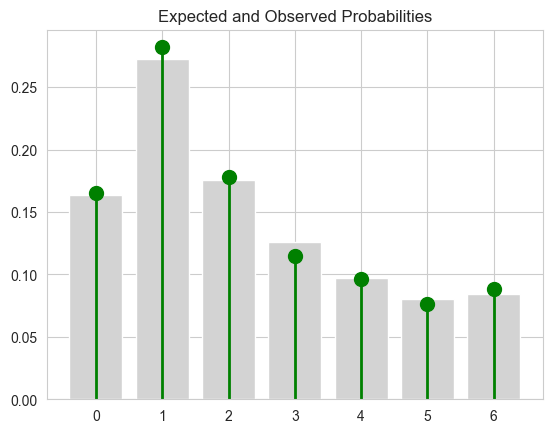

In [29]:
generate_discrete_dist(new_disc_f, 1000)

Generating 10000 values

{0: 0.1662, 1: 0.2876, 2: 0.1781, 3: 0.1186, 4: 0.0943, 5: 0.0686, 6: 0.0866}


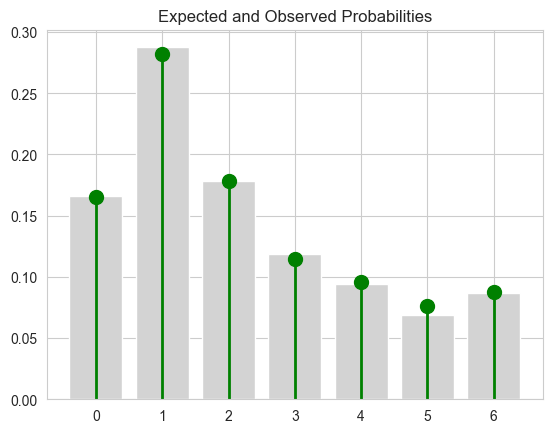

In [30]:
generate_discrete_dist(new_disc_f, 10000)

Now, the results are much better. The observed and expected probabilities are close enough.

{0: 0.16498, 1: 0.28073, 2: 0.17812, 3: 0.11489, 4: 0.09559, 5: 0.07767, 6: 0.08802}


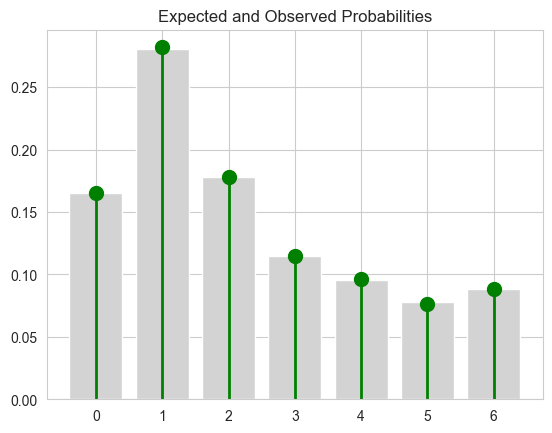

In [31]:
generate_discrete_dist(new_disc_f, 100000)

The more you increase the generated data, the better results you get.

## References

- Unpingco, J. (2019) Python for Probability, Statistics, and Machine Learning, USA: Springer, chapter 2